<a href="https://colab.research.google.com/github/Rushil61/CTC_SALARY_PREDICTION/blob/main/code/CTC_SALARY_PREDICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***IMPORTING LIBRARIES AND DATASET***

In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




In [ ]:
data = pd.read_excel('/content/Data_file (1).xlsx', header = 2)
test = pd.read_excel('/content/Test_data_file (1).xlsx')

In [ ]:
data.shape

(1338, 9)

In [ ]:
test.shape

(1338, 24)

# ***Data preprocessing***

In [ ]:
data.describe()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,386.391641,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,335.250000,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,669.500000,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,1003.750000,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,1338.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   int64  
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   int64  
 5   Previous job changes  1338 non-null   int64  
 6   Graduation marks      1338 non-null   int64  
 7   Exp (Months)          1338 non-null   int64  
 8   CTC                   1338 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 94.2+ KB


In [ ]:
data.isnull().sum()

S.No.                   0
College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [ ]:
data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [ ]:
data = data.drop('S.No.',axis=1)

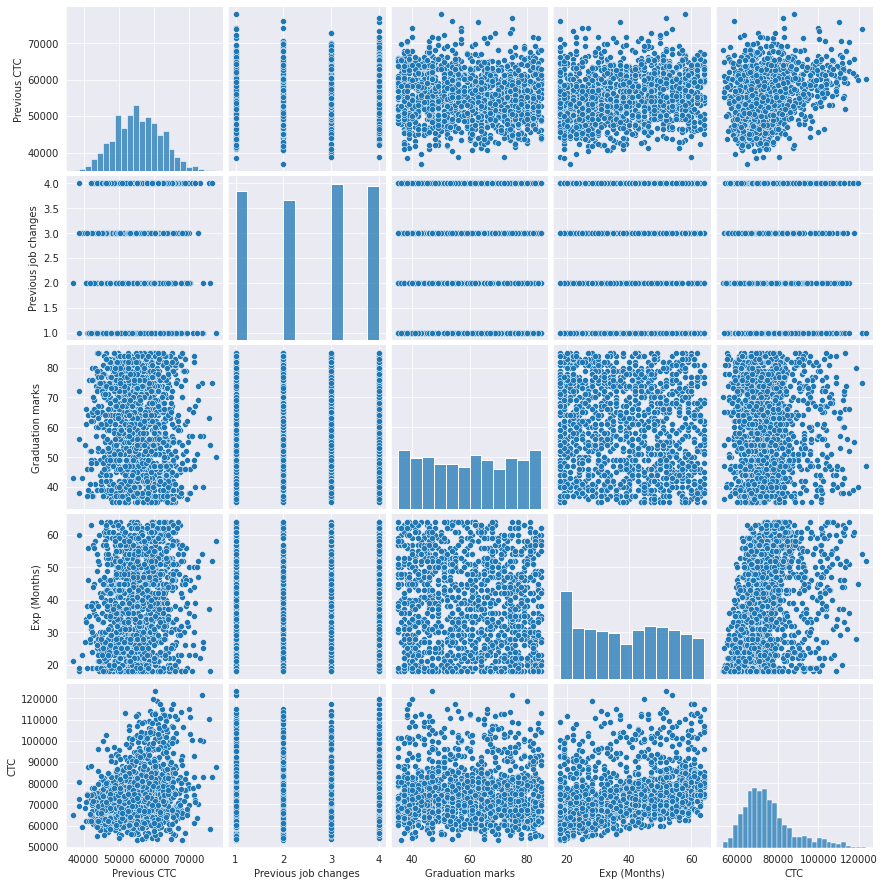

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [ ]:
data = pd.get_dummies(data,drop_first = True)

In [ ]:
data.head(5)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


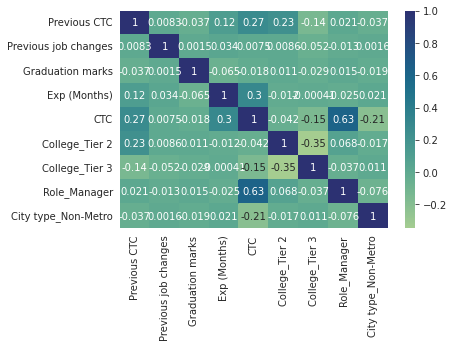

In [ ]:
sns.heatmap(data.corr(),cmap='crest',linecolor='red',annot=True)

In [ ]:
test.describe()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,0.0,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
mean,0.485052,0.272048,0.204783,0.505232,55581.762332,2.525411,59.890882,39.207025,75459.338993,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
std,0.499963,0.445181,0.403694,0.500160,6685.600553,1.123502,14.894696,14.049960,12551.280263,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.319026,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
25%,0.000000,0.000000,0.000000,0.000000,50547.000000,2.000000,47.000000,27.000000,66905.070033,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
50%,0.000000,0.000000,0.000000,1.000000,55293.500000,3.000000,60.000000,39.000000,73112.640487,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
75%,1.000000,1.000000,0.000000,1.000000,60150.500000,4.000000,73.000000,51.000000,80747.178420,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
max,1.000000,1.000000,1.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.994271,NaN,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639


In [ ]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = test.drop(['College_T1','College_T2','Role_Manager','City_Metro' ,'Predicted CTC','Unnamed: 13', 'Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23'],axis=1)

In [ ]:
test.rename(columns={'previous CTC': 'Previous CTC','Exp':'Exp (Months)','previous job changes':'Previous job changes'},inplace=True)

In [ ]:
test.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
1,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
2,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
3,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
4,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [ ]:
test = pd.get_dummies(test,drop_first=True)

In [ ]:
test.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.576531,0,0,1,1
1,57081,1,84,18,68005.870631,1,0,0,0
2,60347,2,52,28,76764.020277,1,0,0,0
3,49010,2,81,33,82092.386880,0,1,0,0
4,57879,4,74,32,73878.097729,0,1,0,0


# ***SPLITTING THE DATASET INTO TRAIN AND TEST***

In [ ]:
x_train = data.drop('CTC',axis=1)
y_train = data['CTC']

In [ ]:
x_test = test.drop('Actual CTC',axis=1)
y_test = test['Actual CTC']

In [ ]:
print(x_test.shape)

(1338, 8)


# ***MODEL FITTING***

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

# ***MODEL EVALUATION***

In [ ]:
print("Mean Squared Error =", mean_squared_error(y_test,y_pred))

Mean Squared Error = 61677937.04530962


In [ ]:
predicted_data= pd.concat([test , pd.DataFrame(y_pred, columns= [ 'Previous CTC'])],axis=1)
predicted_data= predicted_data[['College_Tier 2','College_Tier 3','City type_Non-Metro','Previous job changes','Graduation marks','Exp (Months)','Role_Manager']]
predicted_data

,College_Tier 2,College_Tier 3,City type_Non-Metro,Previous job changes,Graduation marks,Exp (Months),Role_Manager
0,0,0,1,3,66,19,1
1,1,0,0,1,84,18,0
2,1,0,0,2,52,28,0
3,0,1,0,2,81,33,0
4,0,1,0,4,74,32,0
...,...,...,...,...,...,...,...
1333,0,1,0,4,68,50,0
1334,0,0,1,1,67,18,0
1335,1,0,1,1,47,18,0
1336,0,0,1,3,69,21,0
